In [64]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target



In [65]:
boston1 = pd.DataFrame(boston.data, columns=boston.feature_names)
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
boston_k = boston.data
var_k1 = boston_k.var()
var_k = np.var(boston_k)
print(var_k)
print(var_k1)

21070.130450709916
21070.130450709916


In [67]:
cov_k = np.cov(boston_k)
print(cov_k)

[[16622.06355154 15578.60363728 15481.84578657 ... 16180.25898374
  16079.18299926 16169.97435782]
 [15578.60363728 14811.68625249 14685.22871487 ... 15301.65158116
  15197.72120325 15278.04846787]
 [15481.84578657 14685.22871487 14584.37392945 ... 15166.25863109
  15064.94128304 15155.32923049]
 ...
 [16180.25898374 15301.65158116 15166.25863109 ... 15875.78260674
  15771.03884538 15843.56956675]
 [16079.18299926 15197.72120325 15064.94128304 ... 15771.03884538
  15667.47938402 15740.21587819]
 [16169.97435782 15278.04846787 15155.32923049 ... 15843.56956675
  15740.21587819 15820.05663995]]


In [68]:
mean_cov_k = np.mean(cov_k)
print(mean_cov_k)

19637.840980498564


In [69]:
k = var_k/mean_cov_k
print(k)



1.0729351801775813


In [70]:
b = 0
x1_min = 0
y1_min = k * x1_min + b
x1_max = 50
y1_max = k * x1_max + b

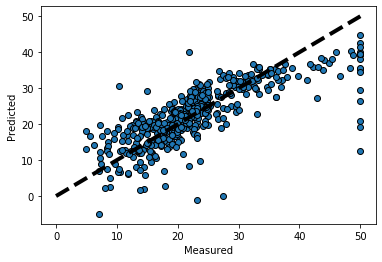

In [71]:
predicted = cross_val_predict(lr, boston.data, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([x1_min,x1_max],[y1_min,x1_max],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()